<a href="https://colab.research.google.com/github/Yamm23/Learning-Macine-Learning/blob/main/Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/LearningAI_CSV/Titanic_dataset/Titanic-Dataset.csv')

In [3]:
print(df.isnull().sum())
print(df.info())
print(df.describe())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Non

**Data Preprocessing**

In [4]:
# Replace the null values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
# Encode categorical data
df['Sex']=df['Sex'].str.strip().str.lower().map({'male':0,'female':1})
df['Embarked']=df['Embarked'].map({'C':0,'S':1,'Q':2})
# Removing Useless Features
df = df.drop(['Name', 'Ticket', 'PassengerId','Cabin'], axis=1)

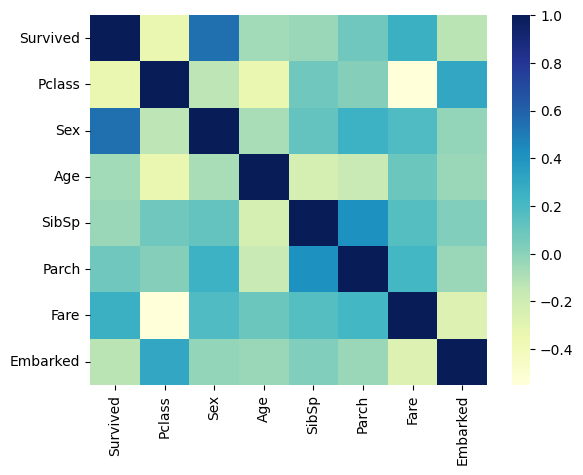

In [5]:
sns.heatmap(df.corr(),cmap = 'YlGnBu')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('Survived',axis = 1)
Y = df['Survived']
X_train, X_val, Y_train, Y_val = train_test_split(X,Y,test_size=0.2)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [10]:
from sklearn.model_selection import train_test_split
X = df.drop('Survived',axis = 1)
Y = df['Survived']
X_train, X_val, Y_train, Y_val = train_test_split(X,Y,test_size=0.2)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [11]:
from sklearn.metrics import accuracy_score
Y_pred = model.predict(X_val)
print('Validation Accuracy:', accuracy_score(Y_val, Y_pred))

Validation Accuracy: 0.7932960893854749


In [12]:
new_data = np.array([[2,1,50.0,2,1,65.53,1]])
prediction = model.predict(new_data)
prediction

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

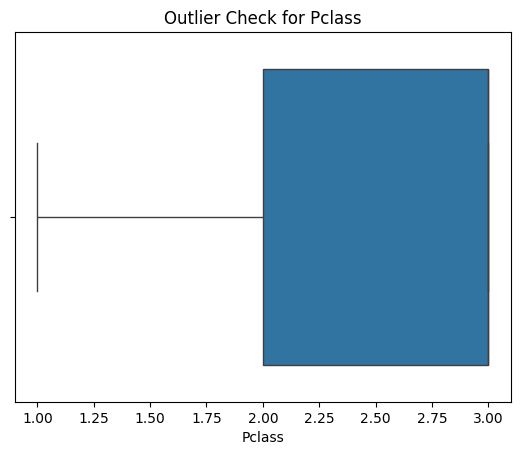

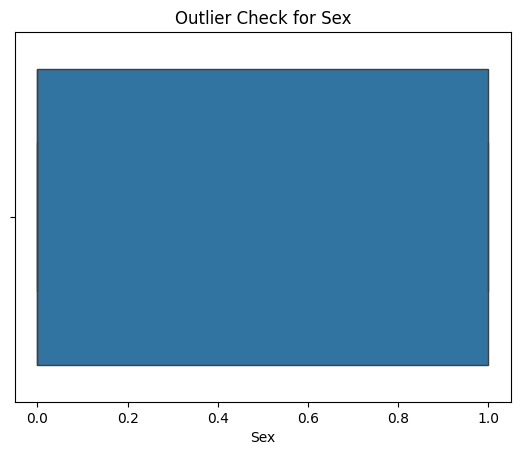

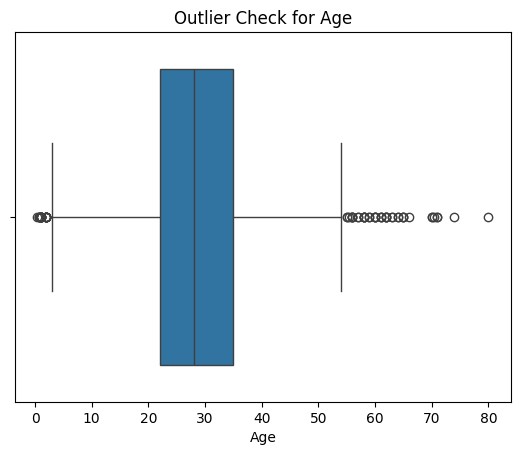

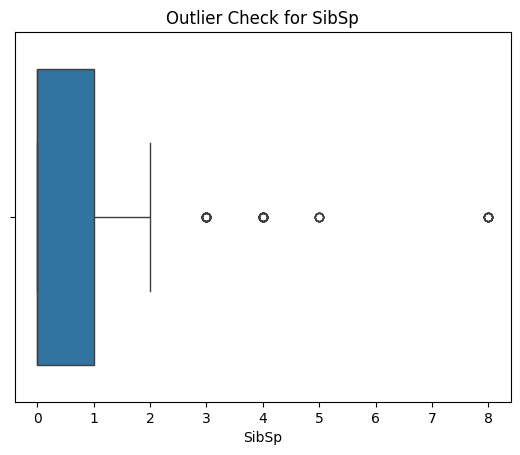

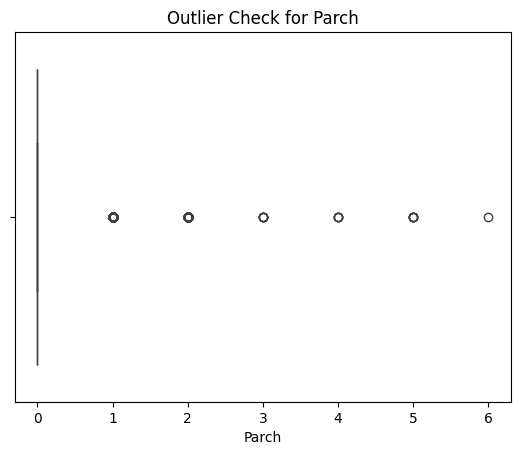

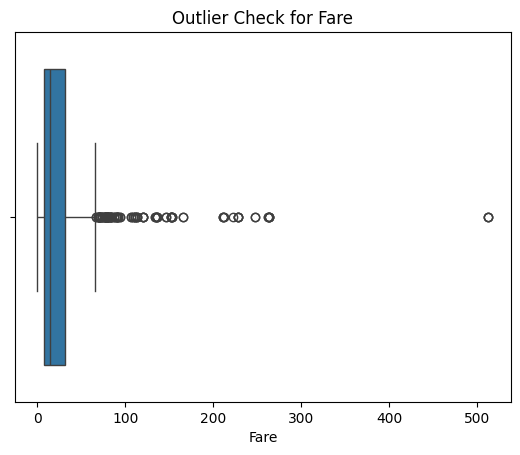

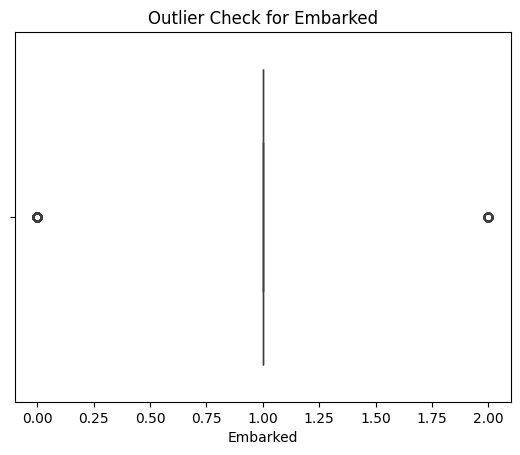

In [ ]:
for col in X.select_dtypes(include=[np.number]).columns:
    sns.boxplot(x=X[col])
    plt.title(f'Outlier Check for {col}')
    plt.show()